# Project

---

This jupyter notebook contains some demonstrations of what we have gathered so far. **This notebook is not developed and we just created it to demonstrate that the financial functions are working and show the end result of load data notebook.**

We start by loading in the dataset with all high probability (0.7) elon musk quotes between 2015 and 2020 that mentions an organization according to spacy lg. This is the dataset we got from doing all the steps in `Load Project.ipynb`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load thwe file with all the ELon Quotes 
elon_org_df = pd.read_csv('Data/org-lg-Elon Musk.csv.bz2')
elon_org_df

,ORG,date,numOccurrences,quotation,quoteID,probas
0,FILAMENTO,2015-03-16 12:32:13,1,Anyone who has used a 3D printer is aware of t...,2015-03-16-004684,"[['Elon Musk', '0.9319'], ['None', '0.0681']]"
1,Orbital Sciences,2015-07-21 18:52:01,4,"The last year has seen three failures: ours, O...",2015-07-21-089084,"[['Elon Musk', '0.973'], ['None', '0.027']]"
2,the Russian Progress,2015-07-21 18:52:01,4,"The last year has seen three failures: ours, O...",2015-07-21-089084,"[['Elon Musk', '0.973'], ['None', '0.027']]"
3,Falcon,2015-12-22 07:57:19,4,11 satellites deployed to target orbit and Fal...,2015-12-22-000553,"[['Elon Musk', '0.9318'], ['None', '0.0665'], ..."
4,Blue Origin,2015-11-29 20:14:20,2,Congrats to Jeff Bezos and the Blue Origin tea...,2015-11-29-012454,"[['Elon Musk', '0.9274'], ['None', '0.0693'], ..."
...,...,...,...,...,...,...
5829,C19,2020-03-13 00:00:00,7,"As a basis for comparison, the risk of death f...",2020-03-13-005119,"[['Elon Musk', '0.7845'], ['None', '0.212'], [..."
5830,youtube,2020-01-10 00:00:00,1,I was sitting in the middle row of my X and I ...,2020-01-10-035268,"[['Elon Musk', '0.7643'], ['None', '0.2357']]"
5831,NASA,2020-02-11 17:35:22,2,NASA called and told us that we'd won a ($1.6 ...,2020-02-11-061218,"[['Elon Musk', '0.8313'], ['None', '0.1625'], ..."
5832,FSD,2020-03-05 10:06:08,3,Perhaps they weren't aware that the computer i...,2020-03-05-052924,"[['Elon Musk', '0.95'], ['None', '0.05']]"


---
We can look at the most common organizations mentioned in Elon's quotes:

In [3]:
org_count_df = elon_org_df.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_df.head(20)

,ORG,counts
745,Tesla,2208
685,SpaceX,159
295,Falcon Heavy,127
104,BFR,123
514,NASA,94
76,Apple,94
815,Twitter,64
317,Ford,62
284,Falcon,57
287,Falcon 9,52


We can see that there are some wrong labeling of companies, but we can manually pick out a subset of companies to focus on.

---

### So from the table above, we decdied to analyze the following companies: Tesla, Apple, Twitter and Ford. 

### The goal of the remainder of this notebook is just to demonstrate an example and make sure that our financial functions are working. You will find additional descriptive statistics as well. 

Here we plot the stockprice for Tesla, in the two weeks following the last quote Elon made (mentioning Tesla) and get a table of the closing prices. 


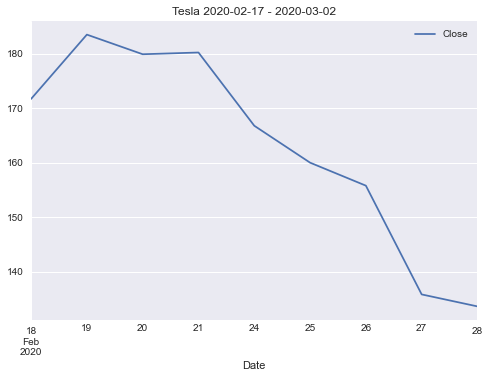

,Close
Date,
2020-02-18,171.679993
2020-02-19,183.483994
2020-02-20,179.882004
2020-02-21,180.199997
2020-02-24,166.757996
2020-02-25,159.981995
2020-02-26,155.759995
2020-02-27,135.800003
2020-02-28,133.598007


In [4]:
from financials import stock_history
from financials import get_dates

start_date, end_date = get_dates(elon_org_df.iloc[-1]['date'], 2, 0)
stock_df = stock_history(elon_org_df.iloc[-1]['ORG'], start_date, end_date, plot=True)
stock_df

---
Here we make a dataframe with only quotes that mentions Apple:

In [5]:
apples = elon_org_df[elon_org_df['ORG'] == 'Apple']
apples

,ORG,date,numOccurrences,quotation,quoteID,probas
7,Apple,2015-10-09 11:30:14,1,They have hired people we've fired. We always ...,2015-10-09-112605,"[['Elon Musk', '0.9157'], ['None', '0.0843']]"
18,Apple,2015-10-09 16:50:01,1,We always jokingly call Apple the `Tesla Grave...,2015-10-09-123220,"[['Elon Musk', '0.8365'], ['None', '0.1635']]"
24,Apple,2015-05-06 23:48:00,3,I actually hope Apple gets into the car busine...,2015-05-06-014632,"[['Elon Musk', '0.7976'], ['None', '0.2024']]"
29,Apple,2015-12-26 06:45:28,1,Important engineers? Apple hired people we've ...,2015-12-26-017915,"[['Elon Musk', '0.9534'], ['None', '0.0466']]"
37,Apple,2015-12-14 22:52:19,1,' Tesla graveyard.' If you don't make it at Te...,2015-12-14-000484,"[['Elon Musk', '0.8681'], ['None', '0.1011'], ..."
...,...,...,...,...,...,...
3958,Apple,2018-11-03 12:36:08,1,I still use an iPhone and everything. But Appl...,2018-11-03-022176,"[['Elon Musk', '0.7474'], ['None', '0.2526']]"
4242,Apple,2018-11-02 20:02:14,1,"And so Apple did that for a long time, I still...",2018-11-02-006794,"[['Elon Musk', '0.8878'], ['None', '0.1122']]"
5082,Apple,2019-07-23 14:00:00,7,"If you don't make it at Tesla, you go work at ...",2019-07-23-028560,"[['Elon Musk', '0.9015'], ['None', '0.0985']]"
5125,Apple,2019-01-08 21:20:50,1,more important to society than [ Apple founder...,2019-01-08-054226,"[['Elon Musk', '0.8839'], ['None', '0.1161']]"


---
We can easily retrieve the stockprices around the time of the quotes and graph them:

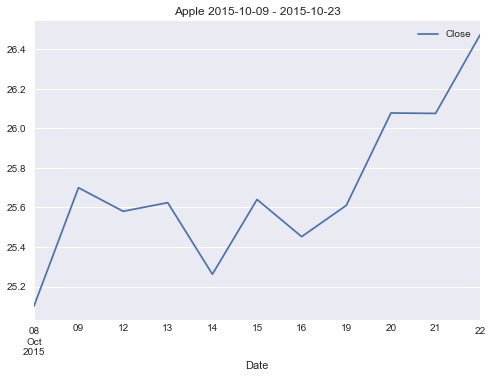

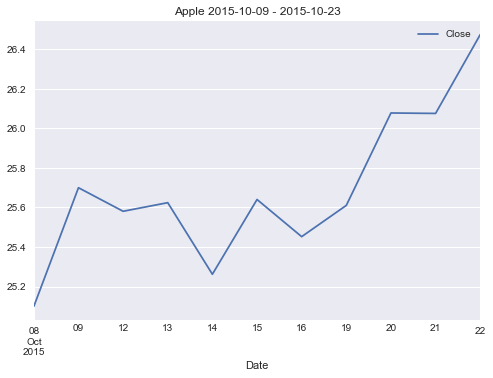

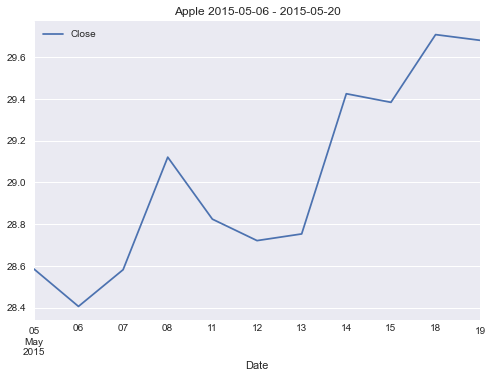

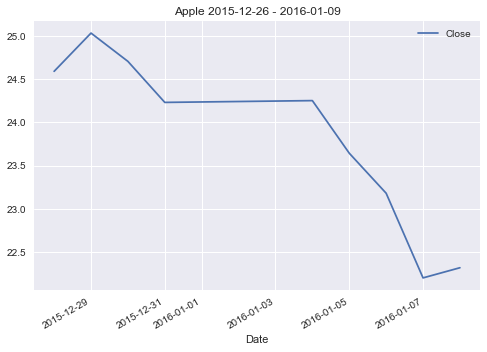

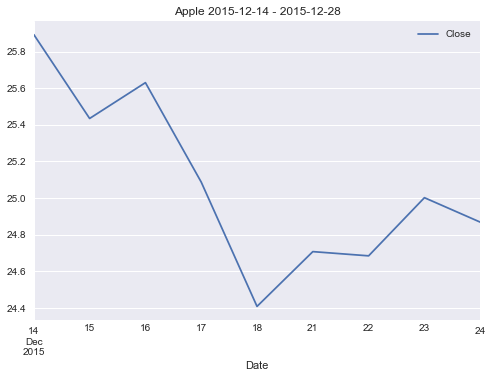

In [6]:
weeks = 2
days = 0

for i in range(5):
    start_date, end_date = get_dates(apples.iloc[i]['date'], weeks, days)
    stock_df = stock_history(apples.iloc[i]['ORG'], start_date, end_date, plot=True)

We can plot the frequency of his quotes that mention companies over the 6 years:

In [7]:
# Make a specific column for year and group by that
elon_org_df['year'] = elon_org_df['date'].str.extract(r'([\d]*)').astype('int')
quotes_per_year = elon_org_df.groupby(['year']).size()

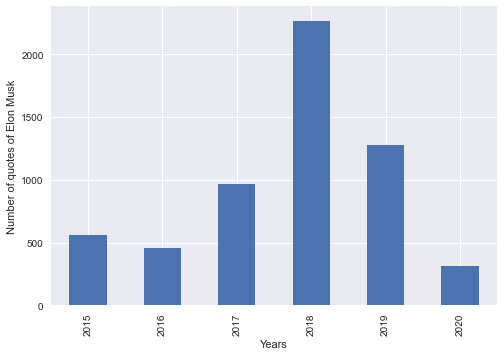

In [8]:
quotes_per_year.plot.bar()
plt.xlabel("Years")
plt.ylabel ("Number of quotes of Elon Musk")
plt.show()

####  We can look at how much he mentions a company in a year

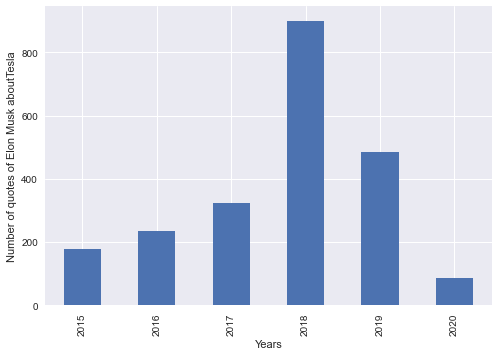

In [9]:
from functions import plot_by_org
plot_by_org(elon_org_df, "Tesla")

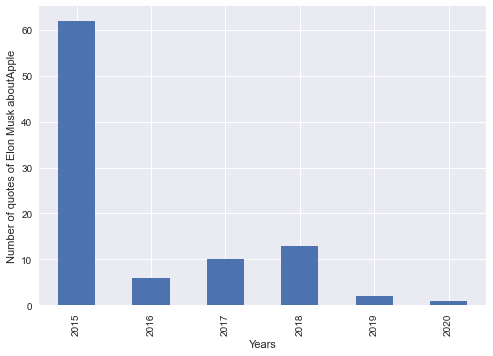

In [10]:
plot_by_org(elon_org_df, "Apple")